# Chemical Kinetics
## Luis Itza Vazquez-Salazar, Silvan Käeser and Markus Meuwly
email: luisitza.vazquezsalazar@unibas.ch

### Index
0. Introduction
1. Simple Kinetics
    * First and second order reactions
    * Reversible reactions
2. Enzyme Kinetics
   * Introduction
   * Michaelis-Menten Model
3. More complex reactions
   * Introduction
   * Oscillating reactions (Belousov-Zhabotinskii reaction)
4. Bibliography


## 0. Introduction

Chemical kinetics refeers to a whole branch of chemistry dedicated to understand how fast chemical reactions happens. In other words, how fast a reactant transforms into a product. 

Let us take the general case of a chemical reaction:

\begin{equation}
 \nu_{a}A + \nu_{b}B + \cdots \ \rightarrow \nu_{x}X + \nu_{y}Y + \cdots \tag{1} 
\end{equation}

In equation 1, $\nu_{i}$ is the stechiometric coefficient of the correspondent reactant or product. 

With this expression on mind, we can say that one of the main missions of chemical kinetics is to study how fast products appear and how fast reactants dissappear. 

Then, we can define ***the reaction rate*** as the change in concentration of a given specie *i* on time. This is:

\begin{equation}
  r= \frac{1}{\nu_{i}} \frac{dC_{i}}{dt} \tag{2}
\end{equation}

where $C_{i}$ is the concetration of an *i* specie, $\nu_{i}$ is the stechiometric coefficient of the *i* specie.

We also known that the change in concentration of one reactant is determined by it's interactions with the other reactants on the reaction. In other words, the reaction rate is dependent on the concentration of the reagents. This is know as ***the law of mass action*** and it is expressed as:

\begin{equation}
 r=k\prod_{i}C_{i}^{n_{i}} \tag{3}
\end{equation}

In equation 3, *k* is the rate constant and $C_{i}$ is the concentration of an *i* specie. The number $n_{i}$ is the order of the reaction and should be obtained experimentally. 


## 1. Simple kinetics
### First and second order kinetics

Once we are familiar with the concepts of chemical kinetcs, we can start solving problems of chemical kinetics.

Suppose a reaction of the type:
 $$ A \rightarrow B $$
 This reaction has a rate law on the form in the case of a first order kinetics:
 $$ r = k C_{a} = -\frac{dC_{a}}{dt} $$
We will assume that when $t=0$ then $C_{a}=C_{a}^{0}$. 

So, we will solve this problem using SymPy and Numpy

**Note**: $C_{a}=[A]$ 

In [1]:
import numpy as np
import sympy as sym

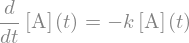

In [2]:
sym.init_printing() #This prints the functions
k, t = sym.symbols('k t') #This defines the symbols 
A = sym.Function('[A]') #This start the function of the concentration
dAdt = A(t).diff(t) #This start the derivative of the concentration with respect to the time
expr = sym.Eq(dAdt, -k*A(t)) #This defines the equation to solve
expr #This prints the expresion to solve

In [3]:
A0 = sym.symbols('[A]_{0}') #This is the initial condition. 
sol_1order = sym.dsolve(expr, ics={A(0):A0}) #This solve the differential equation given a initial condition.
sol_1order

Now that we have the complete solution it is possible to graph the solution that we obtained. We need to give the initial concentration of specie A and the value of constant *k*. 
- Could you plot how the concentration of specie B changes as a function of time?

In [4]:
Ainit = 1 #Inital concentration of reactant A
kreact = 0.02 #Reaction constant
sol_1order_init = sol_1order.subs({A0:Ainit, k:kreact})
data = np.linspace(0,1000,100)
f_A_1order = sym.lambdify(t, sol_1order_init.rhs, 'numpy')
F_A_1order = f_A_1order(data)

Text(0, 0.5, 'Concentration')

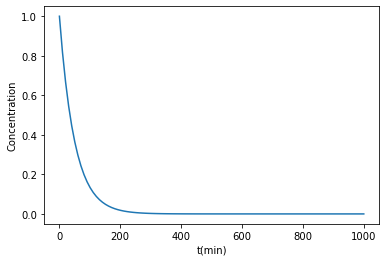

In [5]:
import matplotlib.pyplot as plt
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(data,F_A_1order, label='A')
ax1.set_xlabel('t(min)')
ax1.set_ylabel('Concentration') 

#### Solution
Assuming that the initial concentration of A is equal to:
$$[A]_{0}=[A]+[B]$$
From the solution, we know that $[A] = [A]_{0} e^{-kt}$. Then, subtituying we obtain:
$$[B]=[A]_{0}(1-e^{-kt})$$
which we can plot.

In [7]:
B = Ainit - sol_1order_init.rhs
f_B_1order = sym.lambdify(t,B, "numpy")
F_B_1order = f_B_1order(data)

Text(0, 0.5, 'Concentration')

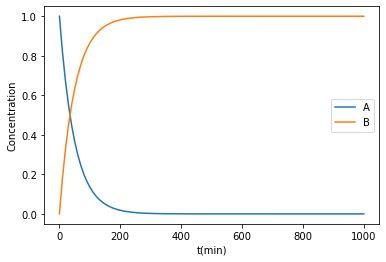

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(data,F_A_1order, label='A')
ax1.plot(data,F_B_1order, label='B')
ax1.legend(loc='best')
ax1.set_xlabel('t(min)')
ax1.set_ylabel('Concentration')


Now that we solved the simplest case. It is easy to extend to more complicated case. 
Assume a system which follows a second-order rate law of the type:
 $$ r = k C_{a}^{2} = -\frac{dC_{a}}{dt} $$
 - Could you integrate this equation using sympy and then plot how the products and reactants behave on time?

#### Solution

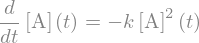

In [9]:
k, t = sym.symbols('k t') #This defines the symbols 
A = sym.Function('[A]') #This start the function of the concentration
dAdt = A(t).diff(t) #This start the derivative of the concentration with respect to the time
expr_2order = sym.Eq(dAdt, -k*(A(t))**2) #This defines the equation to solve
expr_2order #This prints the expresion to solve

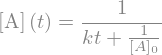

In [10]:
A0 = sym.symbols('[A]_{0}') #This is the initial condition. 
sol_2order = sym.dsolve(expr_2order, ics={A(0):A0}) #This solve the differential equation given a initial condition.
sol_2order

In [11]:
Ainit2 = 1
kreac_2order = 0.02
sol_2order_init = sol_2order.subs({A0:Ainit2, k:kreac_2order})
data = np.linspace(0,1000,100)
f_A_2order = sym.lambdify(t, sol_2order_init.rhs, 'numpy')
F_A_2order = f_A_2order(data)

Text(0, 0.5, 'Concentration')

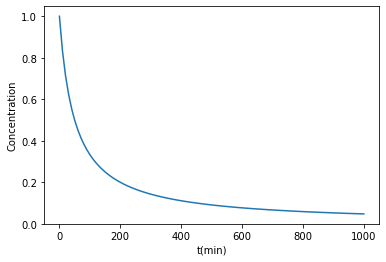

In [12]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(data,F_A_2order, label='A')
ax1.set_xlabel('t(min)')
ax1.set_ylabel('Concentration')

In [13]:
B = Ainit2 - sol_2order_init.rhs
f_B_2order = sym.lambdify(t,B, "numpy")
F_B_2order = f_B_2order(data)

Text(0, 0.5, 'Concentration')

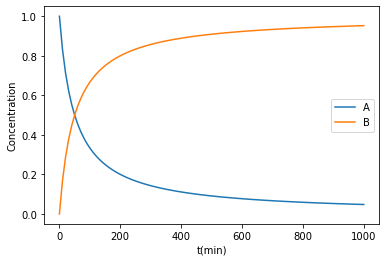

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(data,F_A_2order, label='A')
ax1.plot(data,F_B_2order, label='B')
ax1.legend(loc='best')
ax1.set_xlabel('t(min)')
ax1.set_ylabel('Concentration')

Lets compare the graph of the change in the concentration of reactants and products in time for the first and second order. 

Text(0, 0.5, 'Concentration')

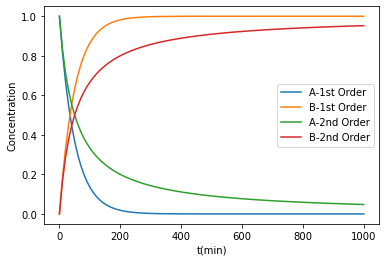

In [15]:
#Lets compare the graph for first and second order
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(data,F_A_1order, label='A-1st Order')
ax1.plot(data,F_B_1order, label='B-1st Order')
ax1.plot(data,F_A_2order, label='A-2nd Order')
ax1.plot(data,F_B_2order, label='B-2nd Order')
ax1.legend(loc='best')
ax1.set_xlabel('t(min)')
ax1.set_ylabel('Concentration')

#### Exercise

Assume a reaction of the type:

$$ A + B \rightarrow C $$

Which is governated by the kinetic equation:

$$ r = -\frac{d[A]}{dt} = -\frac{d[B]}{dt} = k[A][B] $$
Using SciPy derive the general solution for this type of reaction and obtain the plots for the change of concentration for the reactants and products.



### Reversible reactions

In chemistry most of the reactions studied are reversible, this means that there is an additional mechanism which gives place to a return of the products to the reactants. 

We will consider the simplest case of a first-order reaction. Lets consider a reaction of the type:

$$ A \rightleftharpoons B $$

The rate of this reaction can be expressed as:

$$ r = -\frac{d[A]}{dt} = k_{f}[A] - k_{r}[B] $$

$$ r = - \frac{d[B]}{dt} = k_{r}[B] - k_{f}[A] $$

Where $k_{f}$ is the reaction constant for the forward reaction and $k_{r}$ is the reaction constant for the reverse reaction. 

We can write the law of conservation of mass for this system as:

$$ [A]_{0} + [B]_{0} = [A] + [B] $$

Here $[i]_{0}$ is the initial concentration of the $i$ specie ($i = A,B$)  on the reaction. Then, it is possible to expression the equation for the rate of A or B in terms of one variable. 

In this case, we will obtain the concentration of B as a function of the concentration of A.

$$ [B] = [A]_{0} + [B]_{0} - [A] $$

Then, we substitute this on the equation for the rate of A and we obtain:

$$ r = -\frac{d[A]}{dt} = (k_{f} + k_{r}) \left\{ [A]-\frac{k_{r}([A]_{0}+[B]_{0})}{(k_{f}+k_{r})}  \right\} $$

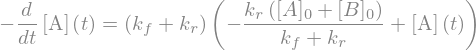

In [16]:
kr, kf, t = sym.symbols('k_{r} k_{f} t') 
A0 = sym.symbols('[A]_{0}') 
B0 = sym.symbols('[B]_{0}')
A = sym.Function('[A]') 
dAdt = A(t).diff(t)
kt = kr + kf
m = (kr*(A0+B0))/kt
expr_1order_rev = sym.Eq(-dAdt, kt*(A(t)-m)) #This defines the equation to solve
expr_1order_rev #This prints the expresion to solve

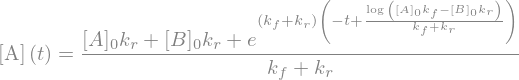

In [17]:
sol_1order_rev = sym.dsolve(expr_1order_rev, ics={A(0):A0}) #This solve the differential equation given a initial condition.
sol_1order_rev

In [18]:
A0_rev=1.0
B0_rev=0.2
kfor=0.45
krev=0.45
sol_1order_rev_init = sol_1order_rev.subs({A0:A0_rev, B0:B0_rev, kr:krev, kf:kfor})
sol_1order_rev_init

In [19]:
data = np.linspace(0,10,100)
f_A_1order_rev = sym.lambdify(t, sol_1order_rev_init.rhs, 'numpy')
F_A_1order_rev = f_A_1order_rev(data)
F_B_1order_rev = A0_rev + B0_rev - f_A_1order_rev(data)

Text(0, 0.5, 'Concentration')

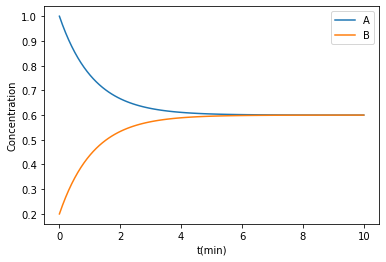

In [20]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(data, F_A_1order_rev, label='A')
ax1.plot(data,F_B_1order_rev, label='B')
ax1.legend(loc='best')
ax1.set_xlabel('t(min)')
ax1.set_ylabel('Concentration')

#### Exercise
Let's consider a reversible bimolecular transformation of second order which can be expressed as:

$$ A + B \rightleftharpoons C + D $$

Obtain the solution for the concentration of all the species on the reaction and plot the evolution on time of them.

##### Hint:
The differential equation that describes the system is:

$$ r = -\frac{d[A]}{dt} = k_{f}[A][B] - k_{r}[C][D] $$

## 2. Enzyme kinetics.
### Introduction
One of the most interesting applications of chemical kinetics is on the study of enzymes. As you might know, enzymes are fundamental components for the develop of chemical reactions on live systems. Enzymes acts as catalysts on chemical reactions this means that its presence can increase or reduce the rate of a reaction. 

The study of enzyme kinetics requires the use of the concepts that we learn on the previous module. We will derive, using SymPy, the well known model of Michaelis-Menten. This is name after the German biochemist Leonor Michaelis and Canadian physician Maud Menten. 

### Michaelis-Menten Model
Let's consider the the rate of hydrolysis of sucrose to glucose and fructose catalysed by the yeast enzyme $\beta$-fructofuranosidase, this process was studied in 1902 by [Brown](https://doi.org/10.1039/CT9028100373). This process have the following mechanism.

$$ E + S \rightleftharpoons ES \rightarrow P + E $$

On this reaction, $E$ is the enzyme, $S$ is the substrate, $ES$ is the complex enzyme-substrate and $P$ is the final product.
The previous reaction can be graphically represented as:
![Model for the behaviour of an enzymatic reaction. Adapted from Ancheyta Juarez, 2017](Enzyme.png) 

It is obvious that we have a system which contains a reversible reaction and then a second reaction that transforms the complex enzyme-substrate into the final product. So, mathematically speaking we can fomulate this as:
\begin{equation}
\frac{d[S]}{dt} = -k_{f}[E][S] + k_{r}[ES] \tag{1}
\end{equation}
\begin{equation}
 \frac{d[E]}{dt} = -k_{f}[E][S] + k_{f} [ES] + k_{cat}[ES] \tag{2}
\end{equation}
\begin{equation}
\frac{d[ES]}{dt} = k_{f}[E][S] - k_{r}[ES] - k_{cat}[ES] \tag{3}
\end{equation}
\begin{equation}
\frac{d[P]}{dt} = k_{cat}[ES] \tag{4}
\end{equation}

To solve this system of differential equations, we need to have few initial conditions for each of the species. This initials conditions are:

$$ [S](t=0)=[S]_{0} \quad  [E](t=0)=[E]_{0} \quad [ES](t=0)=0 \quad [P](t=0)=0 $$

We want to simplify a bit the system of differential equation make its solution easy. So, we notice that equation 4 is uncoupled form the other 3, then its solution can be expressed as:

\begin{equation}
[P](t) = k_{cat} \int_{0}^{t} [ES](t') dt' \tag{5}
\end{equation}

Equation 5, only depend on the analytical form of $[ES]$ which can be obtained from equations 1,2 and 3. 

We can simplify more our systems of equations by looking at the concentration of the enzyme. We known that the total concentration is constant through the process, this means that the sum of the free enzyme and the enzyme on the complex with the substrate is equal to a constant. Then, we can add equations 2 and 3 to obtain 

$$ \frac{d[E]}{dt}+\frac{d[ES]}{dt} = 0 \quad \Longrightarrow \quad [E](t)+[ES](t) = [E]_{0} $$

This idea can being applied also to the concentration of the substrate and we can obtain the following expression for the mass balance of the substrate:

$$ [S](t)+[ES](t) + [P](t) = [S]_{0} $$

Using the initial conditions previously defined we reduces the original system of equations to:

\begin{equation}
\frac{d[S]}{dt} = -k_{f}([E]_{0} - [ES])[S] + k_{r}[ES]\tag{6}
\end{equation}
\begin{equation}
\frac{d[ES]}{dt} = k_{f}([E]_{0}-[ES])[S] - (k_{r} + k_{cat})[ES] \tag{7}
\end{equation}

To solve this set of equations, it is assume that the initial stage of complex $[ES]$ formation is very fast and then it is on equilibrium. This assumption is known as **quasi-steady-state approximation**. This implies that:

$$ \frac{d[ES]}{dt} \approx 0 $$

Equation 7 reduces to:

\begin{equation}
[ES](t)= \frac{[E]_{0} [S](t)}{[S](t) + K_{m}} \tag{8}
\end{equation}

In equation 8, $K_{m}$ is the Michaelis constant and it is defined as:

$$ K_{m} = \frac{k_{r}+k_{cat}}{k_{f}} $$

Subtituing equation 8 on equation 6, we obtain:

\begin{equation}
\frac{d[S]}{dt} = -\frac{k_{cat}[E]_{0}[S](t)}{[S](t) + K_{m}} \tag{9}
\end{equation}

We will obtain a close solution for equation with the aid of Scipy and we will obtain a graph for the distribution of reactants, products and the activated complex.

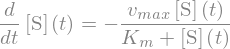

In [21]:
#kr, kf, kcat, t = sym.symbols('k_{r} k_{f} k_{cat} t') 
km, vmax, t = sym.symbols('K_{m} v_{max} t ')
S0 = sym.symbols('[S]_{0}') 
#E0 = sym.symbols('[E]_{0}')
S = sym.Function('[S]')
#E = sym.Function('[E]')
dSdt = S(t).diff(t)
#Km = (kr + kcat)/kf
eq1_mm = sym.Eq(dSdt, -(vmax*S(t))/(S(t)+km))
eq1_mm

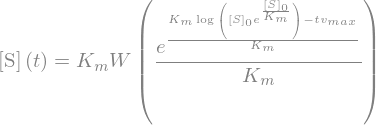

In [22]:
sol_mm = sym.dsolve(eq1_mm, ics={S(0):S0}) #This solve the differential equation given a initial condition.
sol_mm

Here $W$ is the *omega function*. This function was introduced by Euler on 1779. And it was obtained as solution of the Michaels-Menten equation in 1997 by [Schnell and Mendoza](https://doi.org/10.1006/jtbi.1997.0425). 
Now, let's plot the evolution of the concentration of the substrate with respect of the time. We will assume that the inital substarte concentration is $[S]_{0}=10$ and $K_{m} = 1$ and $V_{max}=k_{cat}[E]_{0}$. 

Also we will obtain the concentration of the product as:

$$[P] = [S]_{0}-K_{m}W\left(\frac{[S]_{0}}{K_{m}}exp\left( \frac{([S]_{0}-V_{max}t)}{K_{m}}\right)\right) $$ 


In [23]:
S0_mm=10.
E0_mm=2
kfor_mm=1.0
krev_mm=0.5
kcat_mm=0.5
vmax_mm = E0_mm*kcat_mm
km_mm = (krev_mm + kcat_mm)/(kfor_mm)
sol_mm_init = sol_mm.subs({S0:S0_mm, vmax:vmax_mm, km:km_mm})
p_mm = S0_mm - sol_mm_init.rhs
sol_mm_init.rhs

In [24]:
from scipy.special import lambertw
data = np.linspace(0,25,1000)
#f_S_mm = sym.lambdify(t, sol_mm_init.rhs)
#f_S_mm = sym.lambdify(t, sol_mm_init.rhs, [{'LambertW': lambertw}, 'scipy'])
f_P_mm = sym.lambdify(t,p_mm, [{'LambertW': lambertw}, 'numpy'] )
f_S_mm = sym.lambdify(t, sol_mm_init.rhs, [{'LambertW': lambertw}, 'numpy'])
F_S_mm = f_S_mm(data)
F_P_mm = f_P_mm(data)

/Users/itza/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/itza/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Concentration')

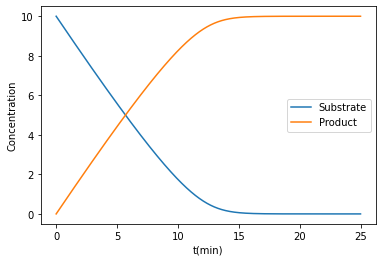

In [25]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(data,F_S_mm, label = 'Substrate')
ax1.plot(data,F_P_mm, label = 'Product')
ax1.legend(loc='best')
ax1.set_xlabel('t(min)')
ax1.set_ylabel('Concentration')

### Exercise:

We have the following data for a kinetic reaction:

|Time (h)      | $[S] (\mu M)$ |
|--------------|-------------|
| 0.005615464  | 10.02695057 |
| 0.175585971  | 9.81659803  |
| 0.278033948  | 9.52542664  |
| 0.481286352  | 9.52529515  |
| 0.718642427  | 9.44427907  |
| 0.956272428  | 9.26622778  |
| 1.160027027  | 9.08819839  |
| 1.195500324  | 8.52213771  |
| 1.432628128  | 8.52198431  |
| 1.737598042  | 8.48944201  |
| 1.840274290  | 8.11740794  |
| 2.145609438  | 7.95548535  |
| 2.315671253  | 7.71278774  |
| 2.417662689  | 7.58334170  |
| 2.655155726  | 7.45380802  |
| 2.858955980  | 7.25960610  |
| 3.029109104  | 6.98456341  |
| 3.300249272  | 6.93587049  |
| 3.436161762  | 6.79023001  |
| 3.639870707  | 6.62837316  |
| 3.809658598  | 6.48271076  |
| 4.013504506  | 6.27233631  |
| 4.149599613  | 6.06200568  |
| 4.454615181  | 6.01329084  |
| 4.658461089  | 5.80291639  |
| 4.828477251  | 5.57639131  |
| 5.066152905  | 5.38216748  |
| 5.405409107  | 5.20405044  |
| 5.847295903  | 4.67007186  |
| 6.221203627  | 4.21699979  |
| 6.424273414  | 4.28155845  |
| 6.899076873  | 4.08718122  |
| 7.069229997  | 3.81213853  |
| 7.171449703  | 3.60182982  |
| 7.510386326  | 3.53692053  |
| 7.544946539  | 3.29431058  |
| 7.951588309  | 3.24553000  |
| 8.020389156  | 2.87351784  |
| 8.325450378  | 2.80863047  |
| 8.461499831  | 2.61447237  |
| 8.698810252  | 2.54962883  |
| 8.970087382  | 2.45241830  |
| 9.038203417  | 2.32299418  |
| 9.174252869  | 2.12883609  |
| 9.479040167  | 2.16098394  |
| 9.547795360  | 1.80514431  |
| 9.717446288  | 1.70799953  |
| 10.361170208 | 1.67523809  |
| 10.192478018 | 1.43275961  |
| 10.395958692 | 1.35176545  |
| 10.599393713 | 1.28694382  |
| 10.802920041 | 1.18977712  |
| 11.006355062 | 1.12495549  |
| 11.209790082 | 1.06013386  |
| 11.548863667 | 0.94670696  |
| 11.718971137 | 0.68783681  |
| 11.956327213 | 0.60682073  |
| 12.362786366 | 0.62273030  |
| 12.329230544 | 0.50954446  |
| 12.600507674 | 0.41233393  |
| 12.735781006 | 0.49310896  |
| 13.041161808 | 0.31501383  |
| 13.210173577 | 0.44428455  |
| 13.582985601 | 0.37935335  |
| 13.583670413 | 0.13676531  |
| 14.057926022 | 0.13645851  |
| 14.125311590 | 0.26579498  |
| 14.600115049 | 0.07141774  |
| 14.430098887 | 0.29794282  |
| 14.938777746 | 0.10354368  |
| 15.107698208 | 0.26515947  |
| 15.514750865 | 0.07082607  |
| 15.819492508 | 0.11914645  |
| 15.954674531 | 0.23226655  |
| 16.260009679 | 0.07034396  |
| 16.632913011 | -0.02693231 |
| 16.971575708 | 0.00519362  |
| 17.072927985 | 0.10216309  |
| 17.344296423 | -0.02739251 |
| 17.445603046 | 0.08574950  |
| 17.954099289 | -0.04395950 |
| 17.885983254 | 0.08546462  |
| 18.258703969 | 0.05287850  |
| 18.631515993 | -0.01205270 |
| 19.037701221 | 0.10089208  |

With this data and using the analytical solution of the Michaelis-Menten equation, make a non-linear regresion to obtain the parameters  $V_{m}$ and $K_{m}$.

In [ ]:
#Check this graph!
e_mm = (E0_mm*sol_mm_init.rhs)/km_mm
es_mm = E0_mm - e_mm
f_ES_mm = sym.lambdify(t,es_mm, [{'LambertW': lambertw}, 'numpy'])
f_E_mm = sym.lambdify(t,e_mm, [{'LambertW': lambertw}, 'numpy']) 
F_ES_mm = f_ES_mm(data)
F_E_mm = f_E_mm(data)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(data,F_ES_mm, label = 'Complex')
ax1.plot(data,F_E_mm, label ='Enzyme')
ax1.legend(loc='best')
ax1.set_xlabel('t(min)')
ax1.set_ylabel('Concentration')

## 3. Complex Reactions
#### Disclaimer:
The following section is optative.

### Introduction

Until now, we only experience with systems which can be described with linear diferential equations. However, there are few interesting cases where the rate equations for a system can be non-linear, then the behaviour of the system is considerably more complex. Non-linear systems can show oscilatory solutions or can show the phenomenon of _chaos_. Then this systems are extremly sensitive to changes on the initial conditions, which makes them very hard to predict. 

### Oscillating reactions

As we mention before in this section, we are interested on solving systems which can show oscilatory solutions. In chemistry, there are few cases in which the concentration of intermediat spices oscillates with time. An example of this type of behaviour is shown in the Bolusov-Zhabotinksii (see [video](https://www.youtube.com/watch?v=PpyKSRo8Iec)) reaction after the soviet chemists Boris Belousov and Anatol Zhabotinsky. The complete reaction involves many steps. This are:

$$ BrO_{3}^{-} + Br^{-} + 2 H^{+} \rightarrow HBrO_{2}  + HOBr $$
$$ HBrO_{2} + Br^{-} + H^{+} \rightarrow 2 HOBr $$
$$ HOBr + Br^{-} + H^{+} \rightarrow Br_{2} + H_{2}O $$
$$ 2 HBrO_{2} \rightarrow BrO_{3}^{-} + HOBr + H^{+} $$
$$ BrO_{3}^{-} + HBrO_{2} + H^{+} \rightarrow 2 BrO_{2}^{\cdot} +  H_{2}O $$
$$ BrO_{2}^{\cdot} + Ce^{3+} + H^{+} \rightarrow HBrO_{2} + Ce^{4+} $$
$$ BrO_{2}^{\cdot} + Ce^{4+} + H_{2}O \rightarrow BrO_{3}^{-} + Ce^{3+} + 2 H^{+}$$

Now, let us consider the following series of reactions:

$$ A + Y \rightarrow X \quad k_{1} $$
$$ X + Y \rightarrow P \quad k_{2} $$
$$ B + X \rightarrow 2X + Z \quad k_{3} $$
$$ 2 X \rightarrow Q \quad k_{4} $$
$$ Z \rightarrow Y \quad k_{5} $$

Here A and B are reactants, X, Y and Z are intermediates; and P and Q are products. The reaction in which B and X form X and Z is known as an 'autocatalytic reaction'. This model is known as the ['oregonator'](https://pubs.acs.org/doi/abs/10.1021/ja00780a001) because it was formulated in Oregon, USA. With this model the reactions described before reduces to:

$$ BrO_{3}^{-} + Br^{-} \rightarrow HBrO_{2}  + HOBr \quad r=k_{1}[BrO_{3}][Br^{-}]$$
$$ HBrO_{2} + Br^{-} + H^{+} \rightarrow 2 HOBr \quad r=k_{2}[HBrO_{2}][Br^{-}]$$
$$ BrO_{3}^{-} + HBrO_{2} \rightarrow 2 HBrO_{2} + 2Ce^{4+} \quad r=k_{3}[BrO_{3}^{-}][HBrO_{2}]$$
$$ 2 HBrO_{2} \rightarrow BrO_{3}^{-} + HOBr \quad r =k_{4}[HBrO_{2}]$$
$$ OS + Ce^{+4} \rightarrow 0.5 CBr^{-} \quad r=k_{5}[OS][Ce^{4+}]$$

Here $[OS]$ represent all oxidizable organic species and $C$ is a constant. In this framework, it is possible to derive the concentration for the intermediate species. So, we define:

$$ x=[HBrO_{2}] \quad y=[Br^{-}] \quad and \quad z=[Ce^{4+}]$$

and We will assume that $[BrO_{3}]$ is equal to a constant $a$ and $[OS]$ is equal to a constant $b$. Then, the rate equations are:

\begin{equation}
\frac{dx}{dt} = k_{1}ay -k_{2}xy + k_{3}ax - 2k_{4}x^{2} 
\tag{1}
\end{equation}
\begin{equation}
\frac{dy}{dt}=-k_{1}ay-k_{2}xy+0.5Ck_{5}bz
\tag{2}
\end{equation}
\begin{equation}
\frac{dz}{dt} = 2k_{3}ax - k_{5}bz
\tag{3}
\end{equation}


We will oversimplify these expression to solve it using a model of a cellular automata. Then, we can obtain an approximation to the spatial variation of the concentration. The implementation was taken from [here](https://scipython.com/blog/simulating-the-belousov-zhabotinsky-reaction/)

MovieWriter stderr:
[h264_videotoolbox @ 0x7fe7f6802400] Error: cannot create compression session: -12915
[h264_videotoolbox @ 0x7fe7f6802400] Try -allow_sw 1. The hardware encoder may be busy, or not supported.
Error initializing output stream 0:0 -- Error while opening encoder for output stream #0:0 - maybe incorrect parameters such as bit_rate, rate, width or height



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '200.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/var/folders/b8/d4n_tdk94b9b7d43tpxh45kc0000gn/T/tmpukxphfso/temp.m4v']' returned non-zero exit status 1.

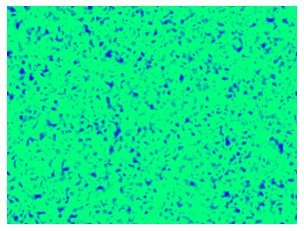

In [3]:
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML, Image
#Width, height of the image
nx, ny = 600, 450
#Reaction paramaters (Please play a bit with this)
alpha = 1.2
beta = 1
gamma = 1
def update(p,arr):
    """Update arr[p] to arr[q] by evolving in time."""

    # Count the average amount of each species in the 9 cells around each cell
    # by convolution with the 3x3 array m.
    q = (p+1) % 2
    s = np.zeros((3, ny,nx))
    m = np.ones((3,3)) / 9
    for k in range(3):
        s[k] = convolve2d(arr[p,k], m, mode='same', boundary='wrap')
    # Apply the reaction equations
    arr[q,0] = s[0] + s[0]*(alpha*s[1] - gamma*s[2])
    arr[q,1] = s[1] + s[1]*(beta*s[2] - alpha*s[0])
    arr[q,2] = s[2] + s[2]*(gamma*s[0] - beta*s[1])
    # Ensure the species concentrations are kept within [0,1].
    np.clip(arr[q], 0, 1, arr[q])
    return arr

# Initialize the array with random amounts of A, B and C.
arr = np.random.random(size=(2, 3, ny, nx))

# Set up the image
fig, ax = plt.subplots()
im = ax.imshow(arr[0,0], cmap=plt.cm.winter)
ax.axis('off')

def animate(i, arr):
    """Update the image for iteration i of the Matplotlib animation."""

    arr = update(i % 2, arr)
    im.set_array(arr[i % 2, 0])
    return [im]

anim = animation.FuncAnimation(fig, animate, frames=200, interval=5, blit=False, fargs=(arr,))
rc('animation',html='html5')
HTML(anim.to_html5_video())
# To view the animation, uncomment this line
#plt.show()

In [3]:
anim._repr_html_() is None

MovieWriter stderr:
[h264_videotoolbox @ 0x7fd34d801200] Error: cannot create compression session: -12915
[h264_videotoolbox @ 0x7fd34d801200] Try -allow_sw 1. The hardware encoder may be busy, or not supported.
Error initializing output stream 0:0 -- Error while opening encoder for output stream #0:0 - maybe incorrect parameters such as bit_rate, rate, width or height



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '200.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/var/folders/b8/d4n_tdk94b9b7d43tpxh45kc0000gn/T/tmpl9x9vn3p/temp.m4v']' returned non-zero exit status 1.

 #### Exercise

Programm a solution for equation 1,2 and 3 using numpy and scipy with the following intial values:
$$X(0)=0, \quad Y(0)=0, \quad X(0)=0.1 \quad \varepsilon_{1}=0.0099, \quad \varepsilon_{2}=2.4802e-5, \quad q=3.1745e-5, \quad C=1 $$ 

__Hint__: Using the following transformations.
$$ X = \frac{2k_{4}x}{k_{5}a} \quad Y=\frac{k_{2}y}{k_{3}a} \quad Z=\frac{k_{5}k_{4}bz}{(k_{3}a)^2} \quad \tau = k_{5}bt $$
and
$$ \varepsilon_{1} = \frac{k5b}{k3a} \quad \varepsilon_{2}=\frac{2k_{5}k_{4}b}{k_{2}k_{3}a} \quad q=\frac{2k_{1}k_{4}}{k_{2}k_{3}} $$
Equations 1,2 and 3 transforms to:

$$ \frac{dX}{d\tau} = \frac{qY-XY+X(1-X)}{\varepsilon_{1}} $$

$$ \frac{dY}{d\tau} = \frac{-qY-XY+CZ}{\varepsilon_{2}} $$

$$ \frac{dZ}{d\tau} = X -Z $$